# Chapter 2 

This Notebook contains the data analysis and model building activity discussed in chapter-2 of **Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow**

Before beginning any ML project, make sure that you download the data (California housing dataset).

Import all the required libraries

In [29]:
# Import all the required libraries
import pandas as pd
import numpy as np

# To plot inline in jupyter notebooks
%matplotlib inline 

import matplotlib.pyplot as plt

## Read the data into a `pandas` dataframe

In [44]:
# By default pd.read_csv() considers the first line or line 0 as 
# header. To make a different line as header use header=1 (or the line number)
# header=None will not use any column header

# To explicitly supply your column names:
df = pd.read_csv("datasets/housing/housing.csv", names = ["c1","c2","c3","c4","c5","c6","c7", "c8","c9","c10"])
df.head()


,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10
0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
2,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
4,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY


In [55]:
# To get help use help(pandas.read_csv) or type pd.read_csv(<press tab>, <press tab>...)
# Use sep= option to mention the separator. 
# If '|' is a separator, use sep='|'
df = pd.read_csv("datasets/housing/housing.csv")

# To get the info of all the attributes in the dataset. 
# pay special attention to Datatypes, non-nulls
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [56]:
# From https://honingds.com/blog/pandas-read_csv/

# index_col option of read_csv()
# This option will help you to convey the row labels
# read_csv(...,index_col = [0,1])
# read_csv(...,index_col = 0)
# read_csv(...,index_col = ["col1", "col2"])


# When you want to read only a specific columns from the file:
# EXAMPLE:
# df = pd.read_csv("f500.csv", usecols = ["company", "rank", "revenues"])

# You can also use column index positions as parameter to usecols
# EXAMPLE:
# df = pd.read_csv("f500.csv", usecols = [0,3,4])

# Column order will be the same as persent in the file.
# For instance, even tjough you supply the usecols = [10,1,0]
# the resulting dataframe will have the columns in the order [0,1,10]

# To enforce the order, you may use:
# df = pd.read_csv("f500.csv", usecols = ["company", "rank", "revenues"])[["revenues", "rank", "company"]]

# To exclude specific columns from reading:
# df = pd.read_csv("f500.csv", usecols = lambda column : column not in ["company" , "rank", "revenues"])

# df.columns will display the list of columns

# If the input file does not have any header, then you convey this
# using header=None option. In this case pandas will use the 
# numbers 0, 1, 2, .. as the column names. 
# If you use header=None along with prefix="COL_",
# then pandas will use the header names as "COL_0", "COL_1" ...

# mangle_dupe_cols
# If a dataset has duplicate column names, convert it to a dataframe by setting mangle_dupe_cols to True.
# df = pd.read_csv(..., mangle_dupe_cols=True)

# dtype
# df = pd.read_csv("f500.csv", dtype = {"revenues" : float})
# Make sure that you always explicitly supply the datatype of columns while reading
# common datatypes: str, int, float


# converters
# Suppose your profit column has commas instead of decimal points.
# define a function:
# f = lambda x: x.replace(',','.')
# Observe that we are supplying a dictionary for converters option
# df = read_csv(..., converters={'profits': f})

# skipinitialspace
# If you have leading/trailing spaces in a field,
# then use skipinitialspace=True option to get rid of these spaces:
# df = pd.read_csv(..., skipinitialspace=True)

# skiprows
# You can use pandas read_csv skip rows

# df = pd.read_csv(..., skiprows=3)
# df = pd.read_csv(..., skiprows=[1,3,4])

# skipfooter
# Indicates number of rows to skip from bottom of the file.

# df = pd.read_csv(..., skipfooter=3)

# nrows
# If you want to read a limited number of rows, instead of all the rows in a dataset, use nrows. 
# df = pd.read_csv(..., nrows=5)

# na_values
# If you want any specific values in the dataset to be considered as NaN values
# df = pd.read_csv(..., na_values=["A", "B", "C"])

# Please note that all these strings are considered as default NaN values by pandas read_csv function 
# ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, 
# ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, 
# ‘n/a’, ‘nan’, ‘null’.

# I think, you can use converters to process different values in a column (if you want to confine)
# only some values in a column to be considered as NaN. For instance all "A" inside column: COL-1 to 
# be considered as NaN calues. For this, you can use the following converter:
# f = lambda x: if x == "A": "NaN" else x
# df = pd.read_csv(...,converters={"COL_!":f})


# skip_blank_lines
# If skip_blank_lines option is set to False, then wherever blank lines are present, NaN values will be inserted into the dataframe.
# If set to True, then the entire blank line will be skipped.


# To rename the columns of a data frame:
# df.columns = ['col-1', 'col-2' ...]

# To set the index of a df:
# df.index = df['col']

# Dealing with datetimes

# use parse_dates=True option to automatically parse the dates. 
# But sometimes it will not work. 

# Suppose the file has a column with the date values as YYYYMM.
# To set this column as the index of the dataframe:

# df.index = pd.to_datetime(df.col_1, format="%Y%m")
# To find the date formats:
# Google pandas documentation, go to API reference, the general functions, then to to_datetime() function
# This will add the index as '1926-01-01', '1926-02-01' ...
# Observe that the date is defaulting to the first day of the month. 
# Use the following to convert that to a month
# df.index = df.index.to_period('M')
# Now we will see '1926-01', '1926-02' ... as the index.
# A timeseries data is nothing but a pandas data frame where the index is of DateTime data type
# Now we can do some cool stuff like, selecting only rows that belong to a specific year:
# df["1979"]









In [57]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [58]:
# The datatypes look good. But most of the times
# THIS IS  NOT THE CASE. HERE IS AN EXAMPLE 
# TO EXPLICITLY CONVERT THE DATA TYPE OF A COLUMN:
df = df.astype(dtype={'longitude':float})
df.info()

# To supply the data type while reading the data frame itself:
df = pd.read_csv("datasets/housing/housing.csv", dtype={'longitude':float})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


<AxesSubplot:>

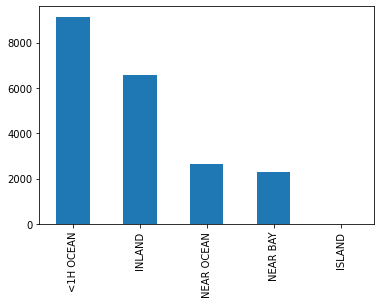

In [63]:
# To get the distinct values and their counts of different levels in a categorical variable
print(df['ocean_proximity'].value_counts())
df['ocean_proximity'].value_counts().plot(kind="bar")

In [66]:
# isnull() will substitute True if the value is Null.
# else it will put False
df.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


In [69]:
# To get the count of all nulls in each columns:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
# To get the count of all nulls in each columns:
df.isnull().sum()

In [70]:
#len(df) or (df.index) will get the number of rows
len(df)

20640

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


Text(0, 0.5, '% of nulls')

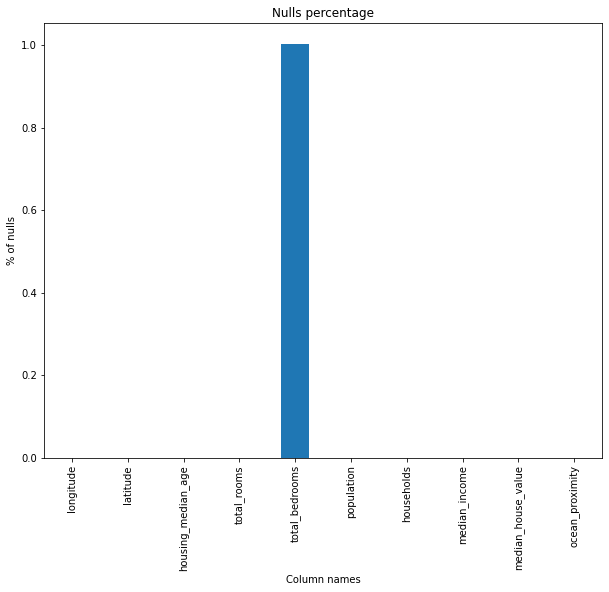

In [85]:
# To find the percentage of all nulls and non-nulls:
print(df.isnull().sum()/len(df.index)*100)
(df.isnull().sum()/len(df.index)*100).plot(kind="bar",figsize=(10,8),title="Nulls percentage")
plt.xlabel("Column names")
plt.ylabel("% of nulls")

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


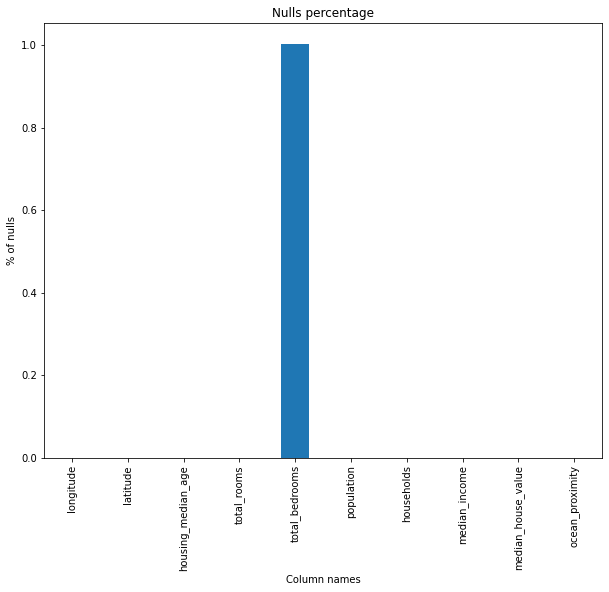

In [86]:
# Helper function to get missing values details:

def missing_values_summary(df, plot=True):
    print(df.isnull().sum()/len(df.index)*100)
    (df.isnull().sum()/len(df.index)*100).plot(kind="bar",figsize=(10,8),title="Nulls percentage")
    plt.xlabel("Column names")
    plt.ylabel("% of nulls")
    
missing_values_summary(df)    

In [22]:
# To get the summary of numeric columns:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [93]:
#pd.plotting.scatter_matrix(df, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

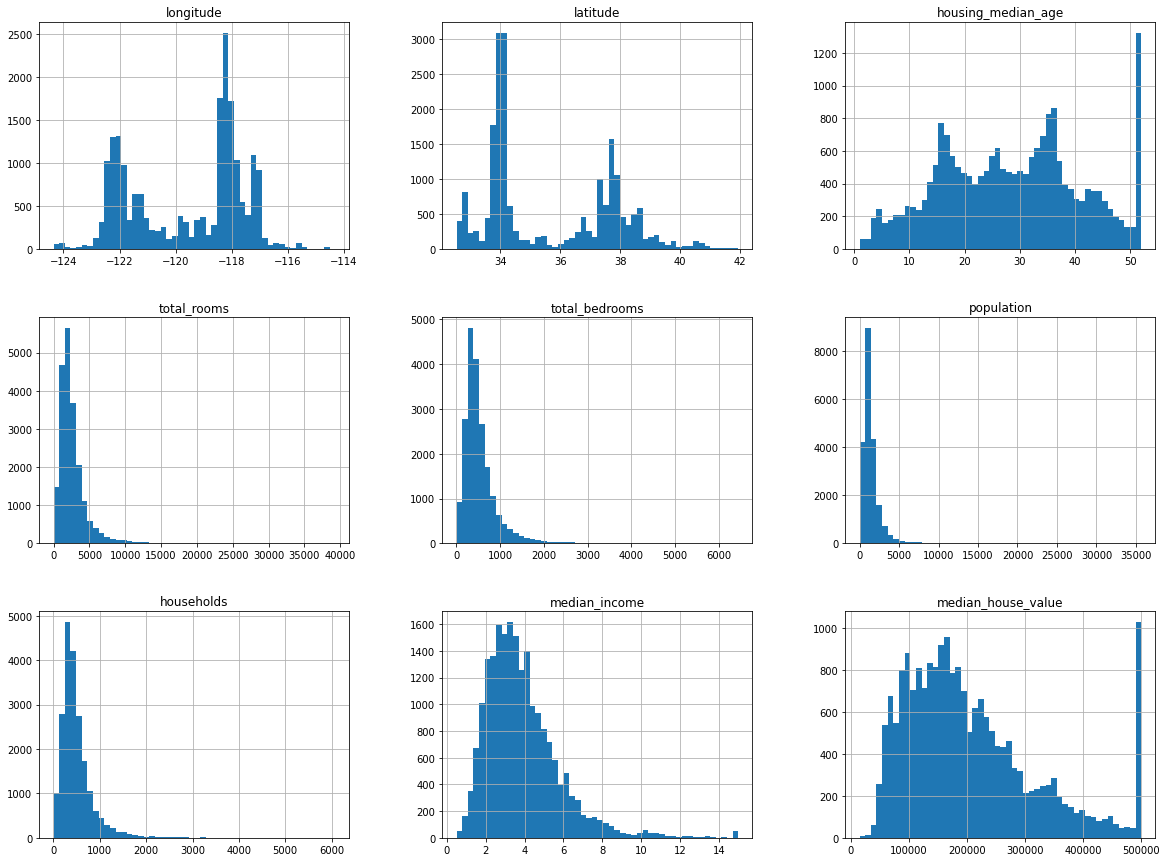

In [92]:
df.hist(bins=50, figsize=(20,15))
plt.show()

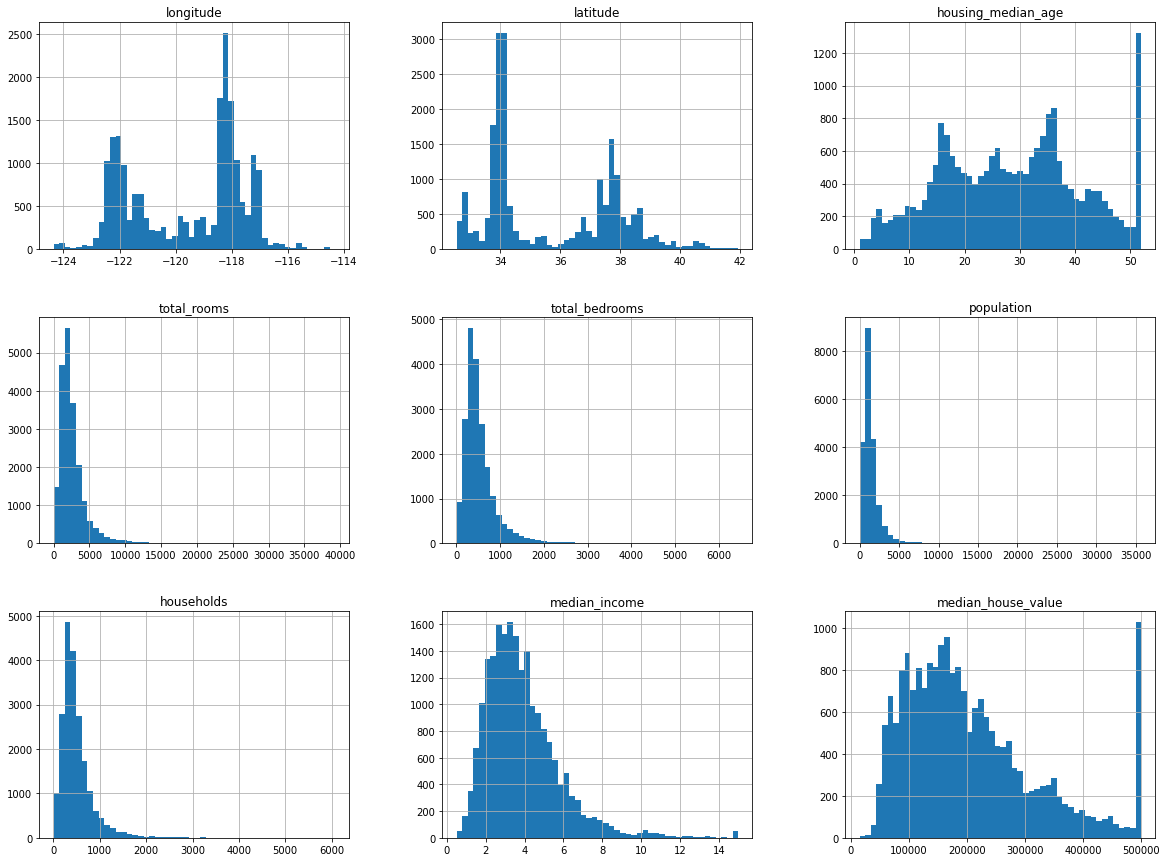

In [25]:
# Before you look any further into the dataset, create a test data set.


# Important commands
`import pandas as pd`

`df = pd.read_csv(<filepath>, sep=",")`